# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/justinas/startup-investments

Import the necessary libraries and create your dataframe(s).

In [422]:
# importing pandas library
import pandas as pd
import numpy as np

# creating dataframes
acquisitions_df = pd.read_csv('acquisitions.csv')
degrees_df = pd.read_csv('degrees.csv')
funding_rounds_df = pd.read_csv('funding_rounds.csv')
funds_df = pd.read_csv('funds.csv')
investments_df = pd.read_csv('investments.csv')
ipos_df = pd.read_csv('ipos.csv')
milestones_df = pd.read_csv('milestones.csv')
objects_df = pd.read_csv('objects.csv')
offices_df = pd.read_csv('offices.csv')
people_df = pd.read_csv('people.csv')
relationships_df = pd.read_csv('relationships.csv')

/var/folders/zf/cb3_1h9969d8z3n17n7d956r0000gn/T/ipykernel_94200/670547435.py:13: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv('objects.csv')


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [423]:
# Finding missing data in table #1: acquisitions_df
# print(acquisitions_df.isna().sum())
# print(acquisitions_df.shape)

# It appears that the column 'term_code' has by far and away the most cells with
# no data, at 7658 out of 9562 total rows in the dataframe (80.01% empty).

# print(acquisitions_df['term_code'].unique())

# The values that show up in 'term_code' (cash, stock, cash_and_stock) still seem
# relevant, though, so I think I'll leave that column in the dataframe. 

# The other columns with significant missing data ('source_url' and 'source_description')
# are columns that I'm already considering dropping as irrelevant to the analysis. 

acquisitions_df.columns

acquisitions_df.drop(columns=['source_url', 'source_description'], inplace=True)
acquisitions_df.head()

# I think I also don't care when something was 'created_at' and 'updated_at' for purposes
# of this analysis

acquisitions_df.drop(columns=['created_at', 'updated_at'], inplace=True)
acquisitions_df.head()

# That's a much nicer-looking dataframe! 


,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01


In [424]:
# Finding missing data in table #2: degrees_df

# print(degrees_df.isna().sum())
# print(degrees_df.shape)

# The 'graduated_at' column is missing data in 47.04% of its rows.  I'm debating whether
# there's any value in knowing when someone graduated in this analysis.  It could help
# determine the age of entepreneurs who are successful in getting their startups funded,
# so perhaps it's still worth keeping in. 

# The 'subject' and 'degree_type' columns are missing data in 25.83% and 10.24% of their rows,
# respectively.  They both still seem like relevant factors to the analysis, though. 

degrees_df.columns

degrees_df.drop(columns=['created_at', 'updated_at'], inplace=True)
degrees_df.head()

,id,object_id,degree_type,subject,institution,graduated_at
0,1,p:6117,MBA,NaN,NaN,NaN
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN


In [425]:
# Finding missing data in table #3: funding_rounds_df
# print(funding_rounds_df.isna().sum())
# print(funding_rounds_df.shape)

# print(funding_rounds_df['pre_money_currency_code'].unique())
# print(funding_rounds_df['post_money_currency_code'].unique())

# I'm debating whether anything pertaining to pre_money or post_money needs to stay in the
# dataframe.  I don't think companies' valuations are going to be part of this analysis -
# rather just whether they did or didn't get funding, and to some extend how much.  Other
# columns with empty rows ('source_url', 'source_description', 'created_by') can also go. 

funding_rounds_df.columns.tolist()

funding_rounds_df.drop([
    'raised_amount',
    'raised_currency_code',
    'pre_money_valuation',
    'pre_money_currency_code',
    'post_money_valuation',
    'post_money_currency_code',
    'source_url',
    'source_description',
    'created_by', 
    'created_at',
    'updated_at'
], axis=1, inplace=True)

funding_rounds_df.head()

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,pre_money_valuation_usd,post_money_valuation_usd,participants,is_first_round,is_last_round
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,0.0,0.0,2,0,0
1,2,2,c:5,2004-09-01,angel,angel,500000.0,0.0,0.0,2,0,1
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,115000000.0,0.0,3,0,0
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,525000000.0,0.0,4,0,0
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,0.0,0.0,2,0,0


In [426]:
# Finding missing data in table #4: funds_df

print(funds_df.isna().sum())
print(funds_df.shape)

# Not much data missing from this dataframe, and most of what's missing is in columns
# that I don't care about anyway. 

funds_df.drop(['source_url', 'source_description', 'created_at', 'updated_at'], axis=1, inplace=True)
funds_df.head()

id                        0
fund_id                   0
object_id                 0
name                      0
funded_at               115
raised_amount             0
raised_currency_code      0
source_url              292
source_description      346
created_at                0
updated_at                0
dtype: int64
(1564, 11)


,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD
3,6,6,f:192,New funds acquire,NaN,625000000.0,USD
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD


In [427]:
# Finding missing data in table #5: investments_df

print(investments_df.isna().sum())
print(investments_df.shape)

# Whoa!  No missing data? 

investments_df.drop(columns=['created_at', 'updated_at'], axis=1, inplace=True)
investments_df.head()

id                    0
funding_round_id      0
funded_object_id      0
investor_object_id    0
created_at            0
updated_at            0
dtype: int64
(80902, 6)


,id,funding_round_id,funded_object_id,investor_object_id
0,1,1,c:4,f:1
1,2,1,c:4,f:2
2,3,3,c:5,f:4
3,4,4,c:5,f:1
4,5,4,c:5,f:5


In [428]:
# Finding missing data in table #6: ipos_df

print(ipos_df.isna().sum())
print(ipos_df.shape)

# Checking values in some of the columns that are missing data

print(ipos_df['valuation_currency_code'].unique().tolist())
print(ipos_df['raised_currency_code'].unique().tolist())

# Seems like those columns are still relevant, even with missing data

ipos_df.drop(columns=['source_url', 'source_description', 'created_at', 'updated_at'], axis=1, inplace=True)
ipos_df.head()

id                            0
ipo_id                        0
object_id                     5
valuation_amount              0
valuation_currency_code       2
raised_amount                 0
raised_currency_code        560
public_at                   600
stock_symbol                  0
source_url                 1068
source_description         1079
created_at                    0
updated_at                    0
dtype: int64
(1259, 13)
['USD', 'JPY', nan, 'CAD', 'EUR', 'GBP']
['USD', nan, 'EUR', 'JPY', 'GBP', 'CAD']


,id,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol
0,1,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19,NASDAQ:AAPL
1,2,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13,NASDAQ:MSFT
2,3,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09,NYSE:DIS
3,4,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25,NASDAQ:GOOG
4,5,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01,NASDAQ:AMZN


In [429]:
# Finding missing data in table #7: milestones_df

print(milestones_df.isna().sum())
print(milestones_df.shape)

# All data is here, except in columns I already don't care about

print(milestones_df['milestone_code'].unique())

# Looks like the 'milestone_code' column also only has 'other' in it as a value,
# which isn't particularly helpful, so I'm going to drop that column, as well. 

milestones_df.drop([
    'milestone_code',
    'source_url',
    'source_description',
    'created_at',
    'updated_at'
], axis=1, inplace=True)

milestones_df.head()

id                        0
object_id                 0
milestone_at              0
milestone_code            0
description               0
source_url             8055
source_description    10188
created_at                0
updated_at                0
dtype: int64
(39456, 9)
['other']


,id,object_id,milestone_at,description
0,1,c:12,2008-06-09,Survives iPhone 3G Stevenote
1,2,c:3138,2008-06-17,Twhirl announces support for Seesmic video pla...
2,3,c:59,2008-06-18,More than 4 Billion videos viewed at Google Si...
3,4,c:314,2008-06-18,Reddit goes Open Source
4,5,c:314,2008-01-22,Adds the ability to create your own Reddits


In [430]:
# Finding missing data in table #8: objects_df

print(objects_df.isna().sum())
print(objects_df.shape)

# This table has a TON of missing data, which is great, because the file is HUGE
# and I need to trim it down a lot to get it to work in Tableau.  So, let's get at
# it...

# 'parent_id' is 94.01% empty.  Gone.
# 'category_code' is 73.37% empty, but it's a column that might be relevant in my analysis,
# so I'm going to leave it for the moment.
# 'founded_at' is 78.29% empty, but it seems like it could he relevant to see how much time
# exists between an entity getting founded and it getting established, so I'm going to leave
# it for the moment.
# 'closed_at', however, I don't think will be relevant, so I'm going to drop it

print(objects_df.columns.tolist())

objects_df.drop([
    'parent_id', 
    'permalink',
    'closed_at',
    'domain', 
    'homepage_url', 
    'twitter_username', 
    'logo_url', 
    'logo_width', 
    'logo_height', 
    'short_description', 
    'description', 
    'overview',
    'created_by', 
    'created_at', 
    'updated_at'
], axis=1, inplace=True)

objects_df.head()

id                          0
entity_type                 0
entity_id                   0
parent_id              434936
name                        4
normalized_name            31
permalink                   0
category_code          339465
status                      0
founded_at             362210
closed_at              459842
domain                 287709
homepage_url           287709
twitter_username       336562
logo_url               253801
logo_width                  0
logo_height                 0
short_description      455034
description            367646
overview               227416
tag_list               356155
country_code           367608
state_code             407891
city                   371967
region                      0
first_investment_at    445695
last_investment_at     445695
investment_rounds           0
invested_companies          0
first_funding_at       431144
last_funding_at        431144
funding_rounds              0
funding_total_usd           0
first_mile

,id,entity_type,entity_id,name,normalized_name,category_code,status,founded_at,tag_list,country_code,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,Wetpaint,wetpaint,web,operating,2005-10-17,"wiki, seattle, elowitz, media-industry, media-...",USA,...,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,Flektor,flektor,games_video,acquired,NaN,"flektor, photo, video",USA,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6
2,c:100,Company,100,There,there,games_video,acquired,NaN,"virtualworld, there, teens",USA,...,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12
3,c:10000,Company,10000,MYWEBBO,mywebbo,network_hosting,operating,2008-07-26,"social-network, new, website, web, friends, ch...",NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0
4,c:10001,Company,10001,THE Movie Streamer,the movie streamer,games_video,operating,2008-07-26,"watch, full-length, moives, online, for, free,...",NaN,...,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0


In [431]:
# Finding missing data in table #9: offices_df

print(offices_df.isna().sum())
print(offices_df.shape)

# print(offices_df['description'].unique())
# this column seems unnecessary

# specific addresses seem unnecessary

offices_df.drop(columns=[
    'description',
    'address1',
    'address2', 
    'created_at',
    'updated_at'
], axis=1, inplace=True)

# offices_df.head()

# Seems like 'region' and 'city' are much more complete sources of data than 'zip_code', 
# 'state_code', so I guess I'll drop those two, as well.

# offices_df.drop(columns=['zip_code', 'state_code'], axis=1, inplace=True)
offices_df.head()

id                   0
object_id            0
office_id            0
description      44188
region               0
address1         18288
address2         68198
city              5168
zip_code         19488
state_code       50701
country_code         0
latitude             0
longitude            0
created_at      112718
updated_at      112718
dtype: int64
(112718, 15)


,id,object_id,office_id,region,city,zip_code,state_code,country_code,latitude,longitude
0,1,c:1,1,Seattle,Seattle,98104,WA,USA,47.603122,-122.333253
1,2,c:3,3,SF Bay,Pleasanton,94588,CA,USA,37.692934,-121.904945
2,3,c:4,4,SF Bay,San Francisco,94107,CA,USA,37.764726,-122.394523
3,4,c:5,5,SF Bay,Menlo Park,94025,CA,USA,37.416050,-122.151801
4,5,c:7,7,SF Bay,Palo Alto,94301,CA,ISR,0.000000,0.000000


In [432]:
# Finding missing data in table #10: people_df

print(people_df.isna().sum())
print(people_df.shape)

# With birthplaces, which was kind of the only potentially useful column in this table,
# being 87.61% empty, this whole dtable seems rather useless.  I'll hold onto it for now,
# just in case.

people_df.drop(columns=['birthplace'], axis=1, inplace=True)
people_df.head()

id                       0
object_id                0
first_name               9
last_name                4
birthplace          198625
affiliation_name        25
dtype: int64
(226709, 6)


,id,object_id,first_name,last_name,affiliation_name
0,1,p:2,Ben,Elowitz,Blue Nile
1,2,p:3,Kevin,Flaherty,Wetpaint
2,3,p:4,Raju,Vegesna,Zoho
3,4,p:5,Ian,Wenig,Zoho
4,5,p:6,Kevin,Rose,i/o Ventures


In [433]:
# Finding missing data in table #11: relationships_df

print(relationships_df.isna().sum())
print(relationships_df.shape)

# Are 'is_past' and 'sequence' in any way relevant?  I don't think so... 

# relationships_df.drop([
#     'start_at',
#     'end_at',
#     'is_past',
#     'sequence',
#     'created_at',
#     'updated_at'
# ], axis=1, inplace=True)

relationships_df.head()

# This whole table is starting to feel rather unnecessary, as well. 

id                             0
relationship_id                0
person_object_id               0
relationship_object_id         0
start_at                  195883
end_at                    301832
is_past                        0
sequence                       0
title                      13352
created_at                     0
updated_at                     0
dtype: int64
(402878, 11)


,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

count    9.562000e+03
mean     3.886191e+08
std      2.660374e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.000000e+05
max      2.600000e+12
Name: price_amount, dtype: float64


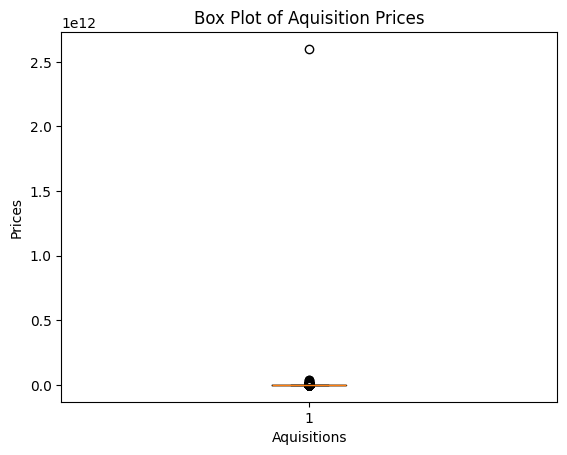

        id  acquisition_id acquiring_object_id acquired_object_id term_code  \
5347  5348            5803             c:38446             c:2467       NaN   

      price_amount price_currency_code acquired_at  
5347  2.600000e+12                 USD  1984-06-27  


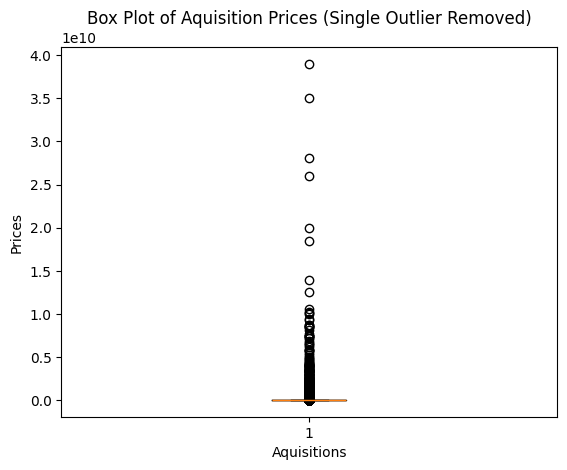

-750000.0
1250000.0


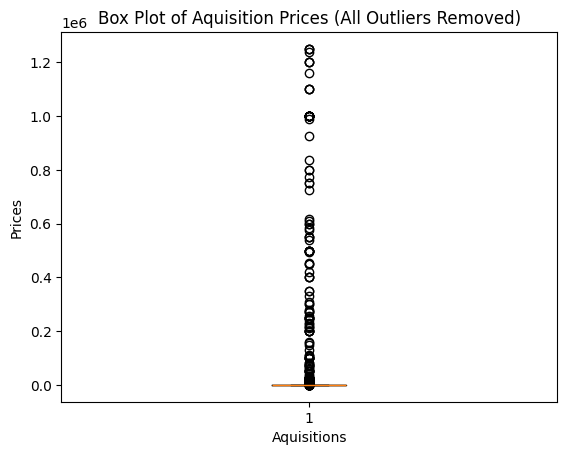

In [434]:
import matplotlib.pyplot as plt
import seaborn as sns

# Finding irregular data in table #1: acquisitions_df

print(acquisitions_df['price_amount'].describe())
# The mean is much higher than the median, which suggested that the data is skewed by a few
# really large aquisitions pulling the mean up.  Not sure if this is inherently bad, though,
# this may just be how the accurate data tracks. 

# The max of 2.6 trillion is exponentially higher than the 75% of 500000.  Again, this points
# to a small number of extreme data points heavily skewing the dataset.  

# There appear to be a lot of rows with 0s in them, as evidenced by the 25% and 50%.
# print((acquisitions_df['price_amount'] == 0).sum())
# print(acquisitions_df['price_amount'].count())

# Yeah, 72.82% of the rows appear to have 0 values in them.  What does that mean for my
# dataset?  

plt.boxplot(acquisitions_df['price_amount'])
plt.title('Box Plot of Aquisition Prices')
plt.xlabel('Aquisitions')
plt.ylabel('Prices')
plt.show()

# Okay, this visualiation seems to show that that 2.6 trillion number is an outlier.  What
# is that acqusition? 

prices_sorted = acquisitions_df['price_amount'].sort_values(ascending=False)
prices_sorted.head()

# Okay, there are multiple aqsuitions greater than 10 billion, but only one over 1 trillion.
# Which aqsuition was over 1 trillion?  Apparently it's the one with id 5348

acquisition_5348 = acquisitions_df.loc[acquisitions_df['id'] == 5348]
print(acquisition_5348)

# Apparently it's aquired_at date was 1984-06-27, but I can't see a way to link that data to
# another table that also lists aquired_at dates... 

# search_date = pd.to_datetime('1984-06-27')
# matching_rows = objects_df[objects_df.isin([search_date]).any(axis=1)]
# print(matching_rows)

# It's possible that the columns containing dates in objects_df aren't in datetime format, but
# I think I can just say that the aqsuition of 2.6 trillion can safely be considered an outlier
# and dropped.  

acquisitions_df = acquisitions_df.drop(index=5347)

plt.boxplot(acquisitions_df['price_amount'])
plt.title('Box Plot of Aquisition Prices (Single Outlier Removed)')
plt.xlabel('Aquisitions')
plt.ylabel('Prices')
plt.show()

# Re-vizualition appears to show that the row containing the $2.6 trillion acquisition was
# successfully dropped.  Now I'm starting to wonder if those acquisitions over $10 billion
# should be considered outliers, as well.  Maybe I should've just done IQR analysis rather
# than relying on visualizations? 

# Using IQR to find outliers
valid_prices = acquisitions_df['price_amount'].dropna()

Q1 = valid_prices.quantile(0.25)
Q3 = valid_prices.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = acquisitions_df[(acquisitions_df['price_amount'] < lower_bound) | (acquisitions_df['price_amount'] > upper_bound)]
outliers.head()

print(lower_bound)
print(upper_bound)

cleaned_acquisitions_df = acquisitions_df[
    (acquisitions_df['price_amount'] >= lower_bound) & 
    (acquisitions_df['price_amount'] <= upper_bound)]

cleaned_acquisitions_df.head()

plt.boxplot(cleaned_acquisitions_df['price_amount'])
plt.title('Box Plot of Aquisition Prices (All Outliers Removed)')
plt.xlabel('Aquisitions')
plt.ylabel('Prices')
plt.show()


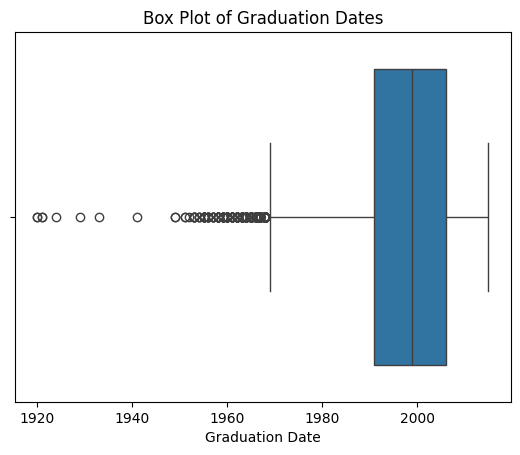

1968-07-01 12:00:00


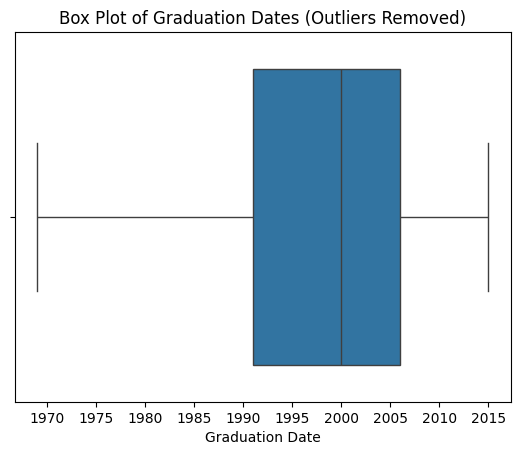

In [435]:
# Finding irregular data in table #2: degrees_df

# It seems like outliers would be most likely in the graduated_at column

# Ensuring column is in valid datetime format
degrees_df['graduated_at'] = pd.to_datetime(degrees_df['graduated_at'], errors='coerce')

# Dropping any rows that didn't have valid dates
valid_dates = degrees_df['graduated_at'].dropna()

# Usnig the IQR to find outliers
Q1 = valid_dates.quantile(0.25)
Q3 = valid_dates.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = degrees_df[(degrees_df['graduated_at'] < lower_bound) | (degrees_df['graduated_at'] > upper_bound)]
outliers.head()
#outliers.tail()

# I'm struggling to understand what this IQR analysis is actually telling me re: what dates are
# outliers.  Maybe a boxplot would be more helpful? 

# Apparently matplotlib doesn't handle datetimes directly.  So, if that's accurate, I just learned
# that.  Apparently seaborn does, though.  

sns.boxplot(x='graduated_at', data=degrees_df)
plt.title('Box Plot of Graduation Dates')
plt.xlabel('Graduation Date')
plt.show()

# What is the axtual lower bound being shown there?
print(lower_bound)

# So, anything before July 1, 1968 is an outlier? 

# Dropping everythign from beefore July 1, 1968
cleaned_degrees_df = degrees_df[degrees_df['graduated_at'] > '1968-07-01']

# Verifying drop worked
cleaned_degrees_sorted = cleaned_degrees_df.sort_values(by='graduated_at', ascending=True)
cleaned_degrees_sorted.head()

sns.boxplot(x='graduated_at', data=cleaned_degrees_df)
plt.title('Box Plot of Graduation Dates (Outliers Removed)')
plt.xlabel('Graduation Date')
plt.show()

# Looks like it worked

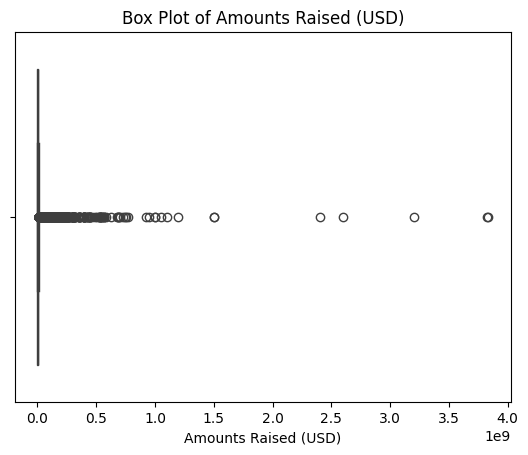

float64
-9434175.0
16380505.0


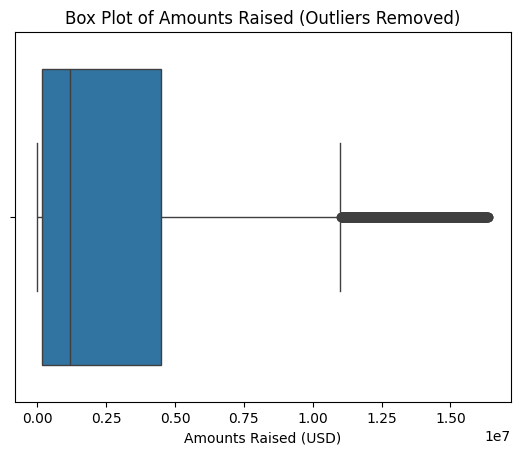

In [436]:
# Finding irregular data in table #3: funding_rounds_df

# Initial visualization
sns.boxplot(x='raised_amount_usd', data=funding_rounds_df)
plt.title('Box Plot of Amounts Raised (USD)')
plt.xlabel('Amounts Raised (USD)')
plt.show()

# Kind of looks like anything over $1 bn raised might be an outlier

print(funding_rounds_df['raised_amount_usd'].dtype)
#float64

# Getting rid of any NaNs 
valid_raised_amounts = funding_rounds_df['raised_amount_usd'].dropna()

# Finding outliers with the IQR 
Q1 = valid_raised_amounts.quantile(0.25)
Q3 = valid_raised_amounts.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = funding_rounds_df[
    (funding_rounds_df['raised_amount_usd'] < lower_bound) | 
    (funding_rounds_df['raised_amount_usd'] > upper_bound)]

outliers.head()

print(lower_bound)
print(upper_bound)

cleaned_funding_rounds_df = funding_rounds_df[
    (funding_rounds_df['raised_amount_usd'] >= lower_bound) & 
    (funding_rounds_df['raised_amount_usd'] <= upper_bound)]

cleaned_funding_rounds_df.head()

# Visualization of cleaned data
sns.boxplot(x='raised_amount_usd', data=cleaned_funding_rounds_df)
plt.title('Box Plot of Amounts Raised (Outliers Removed)')
plt.xlabel('Amounts Raised (USD)')
plt.show()

# I suppose this visualiation is now showing that there are other "outliers", on a more
# granular level.  But we know they're not truly "outliers" in the scope of the whole
# dataset.  


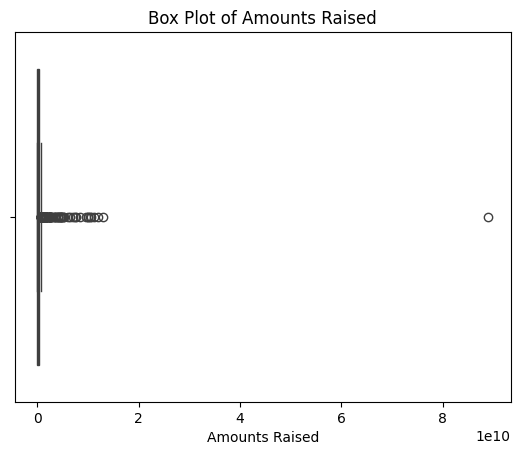

float64
-9434175.0
16380505.0


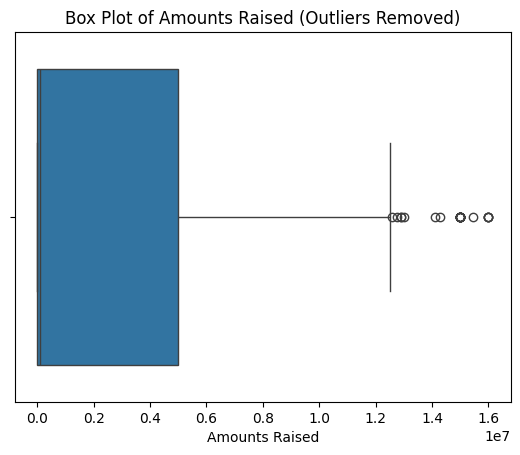

In [437]:
# Finding irregular data in table #4: funds_df

# Initial visualization
sns.boxplot(x='raised_amount', data=funds_df)
plt.title('Box Plot of Amounts Raised')
plt.xlabel('Amounts Raised')
plt.show()

# Looks like there's 1 outlier, way out over $80bn

print(funds_df['raised_amount'].dtype)
#float64

# Getting rid of any NaNs 
valid_raised_amounts = funding_rounds_df['raised_amount_usd'].dropna()

# Finding outliers with the IQR 
Q1 = valid_raised_amounts.quantile(0.25)
Q3 = valid_raised_amounts.quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = funds_df[
    (funds_df['raised_amount'] < lower_bound) | 
    (funds_df['raised_amount'] > upper_bound)]

outliers.head()

print(lower_bound)
print(upper_bound)

cleaned_funds_df = funds_df[
    (funds_df['raised_amount'] >= lower_bound) & 
    (funds_df['raised_amount'] <= upper_bound)]

cleaned_funds_df.head()

# Visualization of cleaned data
sns.boxplot(x='raised_amount', data=cleaned_funds_df)
plt.title('Box Plot of Amounts Raised (Outliers Removed)')
plt.xlabel('Amounts Raised')
plt.show()


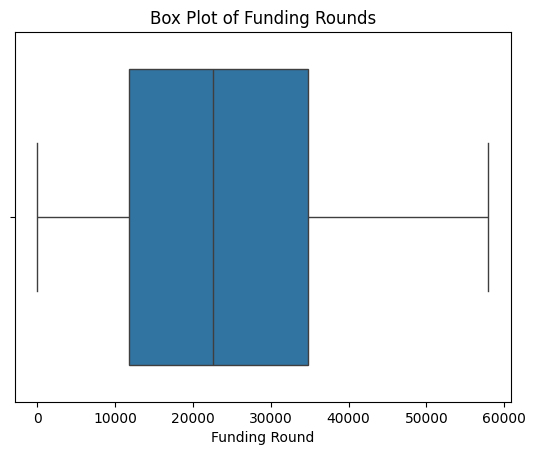

int64


In [438]:
# Finding irregular data in table #5: investments_df

# Initial visualization
sns.boxplot(x='funding_round_id', data=investments_df)
plt.title('Box Plot of Funding Rounds')
plt.xlabel('Funding Round')
plt.show()

# Kind of looks like anything over $1 bn raised might be an outlier

print(investments_df['funding_round_id'].dtype)
#int64

# Looks like there's not any outliers here. 

cleaned_investments_df = investments_df

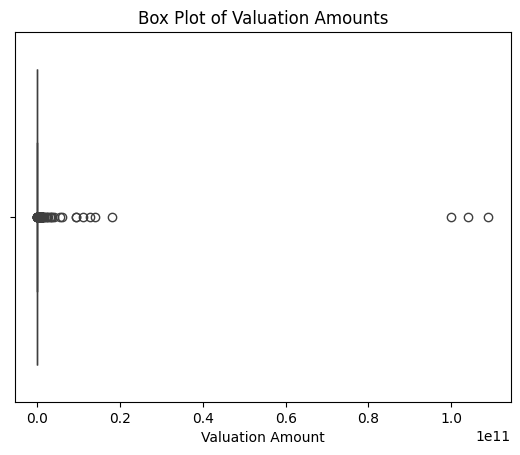

float64
97375000.0
1025937500.0
-1295468750.0
2418781250.0


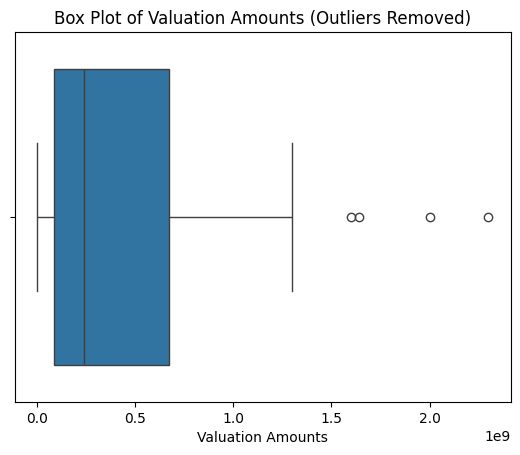

85
101
113


In [439]:
# Finding irregular data in table #6: ipos_df

# Initial visualization
sns.boxplot(x='valuation_amount', data=ipos_df)
plt.title('Box Plot of Valuation Amounts')
plt.xlabel('Valuation Amount')
plt.show()

# Looks like there's a couple outliers out over $100bn

print(ipos_df['valuation_amount'].dtype)
#float64

# Getting rid of any NaNs 
valid_valuation_amount = ipos_df['valuation_amount'].dropna()

valid_valuation_amount.describe()

# Apparently, a lot of 0 values were skewing my quartiles greatly.  Filtering them out.
valid_valuation_amount = valid_valuation_amount[valid_valuation_amount > 0]

# Finding outliers with the IQR 
Q1 = valid_valuation_amount.quantile(0.25)
Q3 = valid_valuation_amount.quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = ipos_df[
    (ipos_df['valuation_amount'] < lower_bound) | 
    (ipos_df['valuation_amount'] > upper_bound)]

outliers.head()

print(lower_bound)
print(upper_bound)

cleaned_ipos_df = ipos_df[
    (ipos_df['valuation_amount'] > 0) &
    (ipos_df['valuation_amount'] >= lower_bound) & 
    (ipos_df['valuation_amount'] <= upper_bound)]

cleaned_ipos_df.head()

# Visualization of cleaned data
sns.boxplot(x='valuation_amount', data=cleaned_ipos_df)
plt.title('Box Plot of Valuation Amounts (Outliers Removed)')
plt.xlabel('Valuation Amounts')
plt.show()

# This didn't give me the boxes that I would've expected in a box-and-wisker plot...

# Checking the remaining valuation_amounts values
print(cleaned_ipos_df['valuation_amount'].nunique())

# Hmm...  there's only 86 remaining values?  That doesn't seem good...

# How many non-0 values were in the original, unfiltered column? 
print(ipos_df[ipos_df['valuation_amount'] > 0]['valuation_amount'].nunique())

# So... there were only 101 non-0 values to begin with.  That makes that... not a very
# helpful column.  

# Is the raised_amount column any better? 
print(ipos_df[ipos_df['raised_amount'] > 0]['raised_amount'].nunique())

# 113 non-0 values in the raised_amount column.  

# Is this whole table just not very helpful (too incomplete)? 

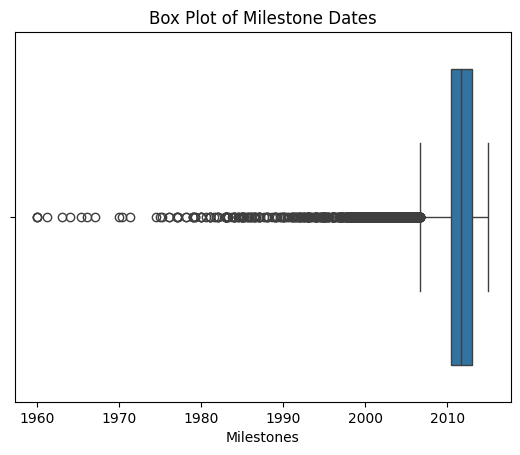

2010-06-22 00:00:00
2013-01-02 00:00:00
2006-09-03 12:00:00
2016-10-20 12:00:00


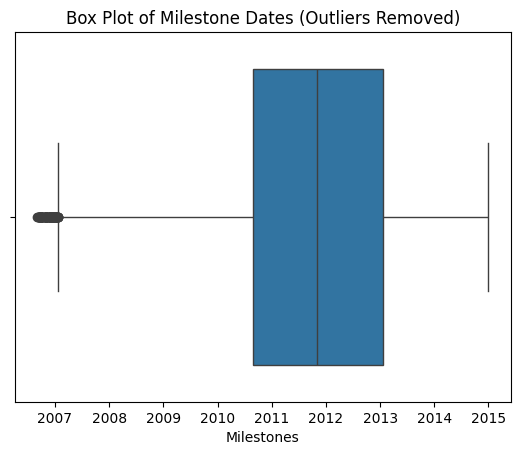

In [440]:
# Finding irregular data in table #7: milestones_df

# The only thing I can think to check is dates to see if any of these milestones happened
# way far outside the grouping of most of the others.  

# Making sure the column is in useable datetime format
milestones_df['milestone_at'] = pd.to_datetime(milestones_df['milestone_at'])

# Initial visualization
sns.boxplot(x='milestone_at', data=milestones_df)
plt.title('Box Plot of Milestone Dates')
plt.xlabel('Milestones')
plt.show()

# Hmm... Looks like this data has a pretty good grouping in the 2010s.
# Should I drop everything below that lower bound? 

# Checking with IQR
Q1 = milestones_df['milestone_at'].quantile(0.25)
Q3 = milestones_df['milestone_at'].quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(lower_bound)
print(upper_bound)

# Looks like anything before 2006-09-03 and after 2016-10-20 is an outlier? 

# outliers = ipos_df[
#     (ipos_df['valuation_amount'] < lower_bound) | 
#     (ipos_df['valuation_amount'] > upper_bound)]

# outliers.head()

cleaned_milestones_df = milestones_df[
    (milestones_df['milestone_at'] >= lower_bound) & 
    (milestones_df['milestone_at'] <= upper_bound)]

cleaned_milestones_df.head()

# Visualization of cleaned data
sns.boxplot(x='milestone_at', data=cleaned_milestones_df)
plt.title('Box Plot of Milestone Dates (Outliers Removed)')
plt.xlabel('Milestones')
plt.show()

# Seems like a more helpful result


float64


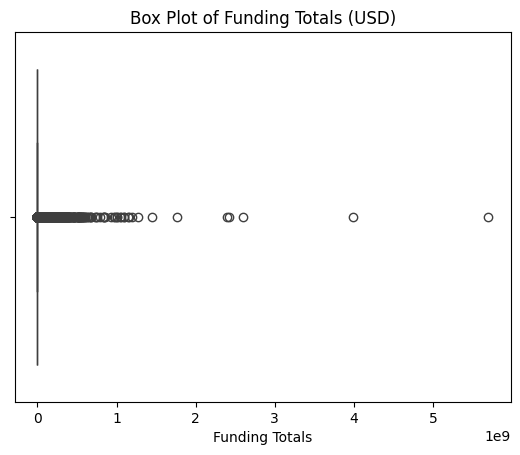

500000.0
11000000.0
-15250000.0
26750000.0


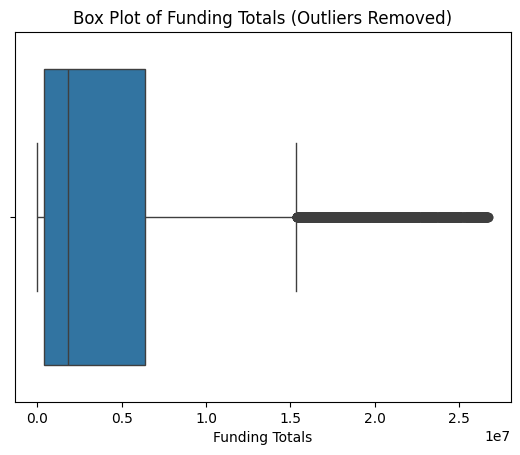

7765
count    2.440600e+04
mean     4.586202e+06
std      6.060455e+06
min      2.910000e+02
25%      4.171345e+05
50%      1.800000e+06
75%      6.400000e+06
max      2.675000e+07
Name: funding_total_usd, dtype: float64


In [441]:
# Finding irregular data in table #8: objects_df

# This table has so many columns, many of which seem like they could be helpfully
# explored for irregularities.  I think I'm going to go with the funding_total_usd
# column, though, as that's funding_total_usd

# Making sure column is in valid data type (int64 / float64)
print(objects_df['funding_total_usd'].dtype)

# Initial visualization
sns.boxplot(x='funding_total_usd', data=objects_df)
plt.title('Box Plot of Funding Totals (USD)')
plt.xlabel('Funding Totals')
plt.show()

# Getting rid of any NaNs 
valid_funding_totals = objects_df['funding_total_usd'].dropna()

valid_funding_totals.describe()

# As with the ipos_df, there are apparently a lot of 0 values skewing the quartiles greatly.  Filtering them out.
valid_funding_totals= valid_funding_totals[valid_funding_totals > 0]

# Checking with IQR
Q1 = valid_funding_totals.quantile(0.25)
Q3 = valid_funding_totals.quantile(0.75)
IQR = Q3-Q1

print(Q1)
print(Q3)

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(lower_bound)
print(upper_bound)

# Looks like anything less than -15250000 (irrelevant) and above 26,750,000 is an outlier? 

cleaned_objects_df = objects_df[
    (objects_df['funding_total_usd'] > 0) &
    (objects_df['funding_total_usd'] >= lower_bound) & 
    (objects_df['funding_total_usd'] <= upper_bound)]

cleaned_objects_df.head()

# Visualization of cleaned data
sns.boxplot(x='funding_total_usd', data=cleaned_objects_df)
plt.title('Box Plot of Funding Totals (Outliers Removed)')
plt.xlabel('Funding Totals')
plt.show()

# Hmm... that plot looks strange.  What kind of values do we have in the cleaned
# 'funding_total_usd column? 

print(cleaned_objects_df['funding_total_usd'].nunique())

# Looks like we have 7766 remaining rows.  What's in them? 

print(cleaned_objects_df['funding_total_usd'].describe())

# Why are there still 0s in this?  I thought I filtered them all out? Apparently I need
# to reapply the filternig when I create the cleaned dataframe.  Correcting that now. 
# Also going back and correcting in in ipos_df where I used the same logic to create a
# cleaned dataframe.  


Series([], Name: office_id, dtype: int64)
0
5168
                     region  num_offices
4923                 SF Bay        12274
3974               New York         7100
3242                 London         5685
3267            Los Angeles         4831
650                  Boston         3401
6624                unknown         2760
6205          Washington DC         2191
1078                Chicago         2038
5230                Seattle         1887
5076              San Diego         1365
4361                  Paris         1357
266                 Atlanta         1290
1349                 Dallas         1236
1415                 Denver         1193
5844                Toronto         1173
286                  Austin         1147
4447           Philadelphia         1043
375               Bangalore          810
4451                Phoenix          773
5971  United States - Other          731
516                  Berlin          722
2479                Houston          710
3645    

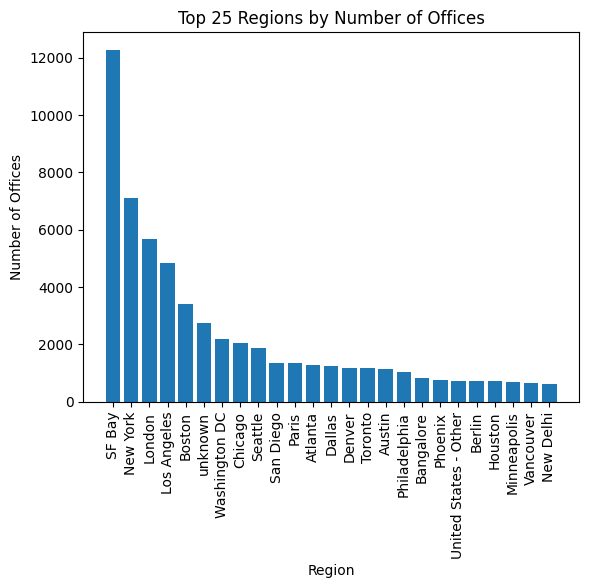

In [442]:
# Finding irregular data in table #9: offices_df

# Taking a bit of a different tact here, checking for duplicates first
duplicate_ids = offices_df['office_id'][offices_df['office_id'].duplicated(keep=False)]
print(duplicate_ids)

# Apparently, no duplicates.  I guess I could see if any rows are missing data in columns
# that I deemd essential in the "inconsistent data" section. 

print(offices_df['region'].isnull().sum())
# No nulls in the regions column

print(offices_df['city'].isnull().sum())
# Hmm... 5168 nulls in the city column, but does that matter.  I guess it lets me know that I'd
# be better off using the region column for analysis, as it's more complete.  I'm just curious
# how regions plots. 

count_by_region = offices_df.groupby('region').size().reset_index(name='num_offices')
top_25_regions = count_by_region.sort_values(by='num_offices', ascending=False).head(25)
print(top_25_regions)

plt.bar(top_25_regions['region'], top_25_regions['num_offices'])
plt.title('Top 25 Regions by Number of Offices')
plt.xlabel('Region')
plt.ylabel('Number of Offices')
plt.xticks(rotation=90)
plt.show()

cleaned_offices_df = offices_df


In [444]:
# Finding irregular data in table #10: people_df

# No numerical data in this table, so going to check for duplicates
duplicate_ids = people_df['object_id'][people_df['object_id'].duplicated(keep=False)]
print(duplicate_ids)

# No duplicates

# Beginning to wonder if this table has any value at all.  What was the other one I was wondering
# that about?  ipos_df? 

cleaned_people_df = people_df

Series([], Name: object_id, dtype: object)


In [445]:
# Finding irregular data in table #11: relationships_df

# No numerical data in this table, so going to check for duplicates
duplicate_ids = relationships_df['relationship_id'][relationships_df['relationship_id'].duplicated(keep=False)]
print(duplicate_ids)

# No dupliates, at least by relationship_id

# Is this table useless, as well?  I suppose seeing what kind of titles pop up most in the 
# title column could be somewhat useful. 

cleaned_relationships_df = relationships_df

Series([], Name: relationship_id, dtype: int64)


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [448]:
# I think I dropped and filtered most things out as I went along in the previous two steps, but
# I'm going to pull the most updated version of each table / dataframe in here to check, though.
# Here's the list:

cleaned_acquisitions_df
cleaned_degrees_df
cleaned_funding_rounds_df
cleaned_funds_df
cleaned_investments_df
cleaned_ipos_df
cleaned_milestones_df
cleaned_objects_df
cleaned_offices_df
cleaned_people_df
cleaned_relationships_df

6963
7217


,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at
17,18,26,c:499,c:495,cash,25000.0,USD,2007-07-01
74,75,96,c:29,c:1238,cash,1000000.0,USD,2005-10-05
110,111,142,c:2042,c:2049,cash,150000.0,USD,2007-10-01
244,245,305,c:5457,c:5456,cash,5000.0,USD,2008-05-13
359,360,444,c:8121,c:3977,cash,1000000.0,USD,2007-05-01


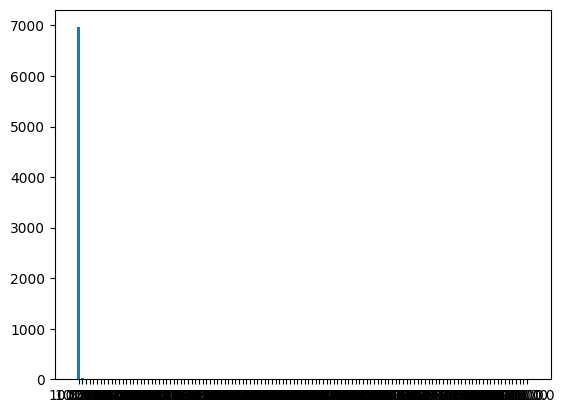

In [447]:
# Seeing if there's anything left in cleaned_aqsuitions_df that I dont' want to keep

cleaned_acquisitions_df.head()

# How many 0s are in that price_amount column? 
print((cleaned_acquisitions_df['price_amount'] == 0).sum())
print(len(cleaned_acquisitions_df['price_amount']))

# Huh... 96.48% of that column is 0s?  Can that be correct? 
price_counts = cleaned_acquisitions_df['price_amount'].value_counts()

plt.bar(price_counts.index.astype(str), price_counts.values)

# Looks like the majority are indeed 0s.  Does that mean I should drop them from
# the analysis?  

squeaky_acquisitions_df = cleaned_acquisitions_df[cleaned_acquisitions_df['price_amount'] > 0]

squeaky_acquisitions_df.head()

# Looks like that owrked

In [449]:
cleaned_degrees_df.head()

# Looks pretty good.  Are there any nulls in the degree_type column? 

print(cleaned_degrees_df['degree_type'].isnull().sum())
print(len(cleaned_degrees_df['degree_type']))

# it appears ~10% of the degree_type column is empty.  Not sure if I should filter
# out those rows, though.  Might still get valuable institution data from them.

print(cleaned_degrees_df['institution'].isnull().sum())

# there's very few nulls in the institution column, so maybe that's the best one to 
# work with. 

squeaky_degrees_df = cleaned_degrees_df


5191
57572
35


In [450]:
cleaned_funding_rounds_df.head()

# how much of each of the pre_money_valuation_usd column is 0s
print((cleaned_funding_rounds_df['pre_money_valuation_usd'] == 0).sum())
print(len(cleaned_funding_rounds_df['pre_money_valuation_usd']))

# All but 24 rows?!  That can't be correct! 

print((cleaned_funding_rounds_df['pre_money_valuation_usd'] > 0).sum())

# Apparently it is. That column seems useless.  Drop.  What about post_money_valuation?

print((cleaned_funding_rounds_df['post_money_valuation_usd'] == 0).sum())
print(len(cleaned_funding_rounds_df['post_money_valuation_usd']))

# 97.62% empty?  Drop.

squeaky_funding_rounds_df = cleaned_funding_rounds_df.drop([
    'pre_money_valuation_usd',
    'post_money_valuation_usd'
], axis=1)

squeaky_funding_rounds_df.head()


47504
47528
24
46395
47528


,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,participants,is_first_round,is_last_round
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,2,0,0
1,2,2,c:5,2004-09-01,angel,angel,500000.0,2,0,1
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,3,0,0
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,2,0,0
5,6,6,c:9,2007-01-01,series-a,a,1500000.0,1,0,1


In [451]:
cleaned_funds_df.head()

# What percentage of the rows in raised_amount are 0s?
print((cleaned_funds_df['raised_amount'] == 0).sum())
print(len(cleaned_funds_df['raised_amount']))

# 171/391 (43.73%)

# Let's filter out rows with 0s in the raised_amount column
cleaned_funds_df = cleaned_funds_df[cleaned_funds_df['raised_amount'] > 0]

print((cleaned_funds_df['raised_amount'] == 0).sum())
print(len(cleaned_funds_df['raised_amount']))

# No 0s now (0/220)

squeaky_funds_df = cleaned_funds_df


171
391
0
220


In [452]:
cleaned_investments_df.head()

# still debating whether I should just drop this whole table?  Can I join to any other
# tables via any foriegn keys found in this table?  Perhaps funding_round_id to
# funding_rounds_df?  I guess I'll leave it in for now.

squeaky_investments_df = cleaned_investments_df

In [453]:
cleaned_ipos_df.head()

# How many 0s are in raised_amount? 
print((cleaned_ipos_df['raised_amount'] == 0).sum())
print(len(cleaned_ipos_df['raised_amount']))

# 70/92?  Are there really only 92 rows left in this table? 

print(cleaned_ipos_df.shape)

# Apparently, yes.  

# I'm debating filtering out all 0-value raised_amount rows, but as I already filtered out all 0-value
# valuation_amount rows and really paired this table down, I think I'll leave it as is for the moment.

squeaky_ipos_df = cleaned_ipos_df



70
92
(92, 9)


In [454]:
cleaned_milestones_df.head()

# already paired down

squeaky_milestones_df = cleaned_milestones_df

In [456]:
cleaned_objects_df.head()
# cleaned_objects_df.shape

# print(cleaned_objects_df['entity_type'].unique())

# # Apparently "company" is the only value in the entity_type column, which makes that column
# # seem completely useless.  Drop.

# # I don't think entity_id can be a foreign key to any other tables, and doesn't do anything here
# # that name doesn't do.  Drop.

# print(cleaned_objects_df['entity_type'].unique())

# print(cleaned_objects_df.columns)

# # What's going on in investment_rounds
# print(cleaned_objects_df['investment_rounds'].unique())

# # # Did a company really have 478 investment rounds?  Seems... unlikely...

# print((cleaned_objects_df['investment_rounds'] == 0).sum())
# 24268 / 24461 rows have 0s in the investment_rounds column? Do all the rows that have 
# 0s in the investment_rounds column also have 0s in their funding_total_usd column.  It
# seems like they should if they didn't... you know... have any funding rounds.  

# no_funding_rounds = cleaned_objects_df[cleaned_objects_df['funding_rounds'] == 0]
# funding_total_check = (no_funding_rounds['funding_total_usd'] == 0).all()
# print(funding_total_check)
# True

cleaned_objects_df.drop([
    'entity_type', 
    'entity_id', 
    'tag_list',
    'state_code'
], axis=1, inplace=True)

squeaky_objects_df = cleaned_objects_df[cleaned_objects_df['funding_rounds'] > 0]

squeaky_objects_df.head()

/var/folders/zf/cb3_1h9969d8z3n17n7d956r0000gn/T/ipykernel_94200/4097282077.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_objects_df.drop([


,id,name,normalized_name,category_code,status,founded_at,country_code,city,region,first_investment_at,...,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
13,c:1001,FriendFeed,friendfeed,web,acquired,2007-10-01,USA,Mountain View,SF Bay,NaN,...,0,0,2008-02-26,2008-02-26,1,5000000.0,2008-05-01,2012-09-13,3,14
20,c:100155,MTPV,mtpv,cleantech,operating,2003-01-01,USA,Austin,Austin,NaN,...,0,0,2011-03-08,2012-01-26,3,10125293.0,2010-01-01,2010-01-01,1,6
26,c:100189,Locatrix Communications,locatrix communications,mobile,operating,2003-11-01,AUS,Brisbane,SF Bay,NaN,...,0,0,2003-11-01,2003-11-01,1,250000.0,2007-11-01,2007-11-01,1,2
32,c:100228,iHireHelp,ihirehelp,education,operating,2010-10-01,USA,NaN,New Jersey - Other,NaN,...,0,0,2011-04-16,2011-04-16,1,100000.0,2010-10-01,2010-10-01,1,0
36,c:100238,Cardiosolutions,cardiosolutions,medical,operating,2006-01-01,USA,West Bridgewater,West Bridgewater,NaN,...,0,0,2011-09-06,2012-07-10,2,11300000.0,NaN,NaN,0,2


In [457]:
cleaned_offices_df.head()

# office_id doesn't foreign key to any other table and isn't helpful here.  Drop.

squeaky_offices_df = cleaned_offices_df.drop(['office_id'], axis=1)

squeaky_offices_df.head()

,id,object_id,region,city,zip_code,state_code,country_code,latitude,longitude
0,1,c:1,Seattle,Seattle,98104,WA,USA,47.603122,-122.333253
1,2,c:3,SF Bay,Pleasanton,94588,CA,USA,37.692934,-121.904945
2,3,c:4,SF Bay,San Francisco,94107,CA,USA,37.764726,-122.394523
3,4,c:5,SF Bay,Menlo Park,94025,CA,USA,37.416050,-122.151801
4,5,c:7,SF Bay,Palo Alto,94301,CA,ISR,0.000000,0.000000


In [459]:
cleaned_people_df.head()

# Still thining about dropping this table.  I suppose object_id theoretically
# links to objects_df, but I'm not sure there's any value in that. 

squeaky_people_df = cleaned_people_df

In [462]:
cleaned_relationships_df.head()

# Also seems like a drop-worthy table. 

squeaky_relationships_df = cleaned_relationships_df

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [ ]:
# Here's my current dataframes
squeaky_acquisitions_df
squeaky_degrees_df
squeaky_funding_rounds_df
squeaky_funds_df
squeaky_investments_df
squeaky_ipos_df
squeaky_milestones_df
squeaky_objects_df 
squeaky_offices_df 
squeaky_people_df 
squeaky_relationships_df 

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?